# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №2: Линейные модели


###### <hr\>
**Общая информация**

**Срок сдачи:** 05 апреля 18:00 Сдача **очная** на онлайн занятии. <br\>


Используйте данный Ipython Notebook при оформлении домашнего задания.

Присылать ДЗ необходимо в виде ссылки на свой github репозиторий на почту ml1.sphere@mail.ru с указанием темы в следующем формате:

[ML0920, Задание 2] Фамилия Имя.



**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw2.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять написанный код и текст, если явно не указана такая возможность. В противном случае -1 балл
<hr\>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

Здравствуйте, уважаемые студенты! 

В этом задании мы будем реализовать линейные модели. Необходимо реализовать линейную и логистическую регрессии с L2 регуляризацией

# Теоретическое введение



Линейная регрессия решает задачу регрессии и оптимизирует функцию потерь MSE 

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right], $$ где $y_i$ $-$ целевая функция,  $a_i = a(x_i) =  \langle\,x_i,w\rangle ,$ $-$ предсказание алгоритма на объекте $x_i$, $w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Не забываем, что здесь и далее  мы считаем, что в $x_i$ есть тождественный вектор единиц, ему соответствует вес $w_0$.


Логистическая регрессия является линейным классификатором, который оптимизирует так называемый функционал log loss:

$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right],$$
где  $y_i  \in \{0,1\}$ $-$ метка класса, $a_i$ $-$ предсказание алгоритма на объекте $x_i$. Модель пытается предсказать апостериорую вероятность объекта принадлежать к классу "1":
$$ p(y_i = 1 | x_i) = a(x_i) =  \sigma( \langle\,x_i,w\rangle ),$$
$w$ $-$ вектор весов (размерности $D$), $x_i$ $-$ вектор признаков (такой же размерности $D$).

Функция $\sigma(x)$ $-$ нелинейная функция, пероводящее скалярное произведение объекта на веса в число $\in (0,1)$ (мы же моделируем вероятность все-таки!)

$$\sigma(x) = \frac{1}{1 + \exp(-x)}$$

Если внимательно посмотреть на функцию потерь, то можно заметить, что в зависимости от правильного ответа алгоритм штрафуется или функцией $-\log a_i$, или функцией $-\log (1 - a_i)$.



Часто для решения проблем, которые так или иначе связаны с проблемой переобучения, в функционал качества добавляют слагаемое, которое называют ***регуляризацией***. Итоговый функционал для линейной регрессии тогда принимает вид:

$$L(w) =  \frac{1}{N}\left[\sum_i (y_i - a_i) ^ 2 \right] + \frac{1}{C}R(w) $$

Для логистической: 
$$L(w) = - \frac{1}{N}\left[\sum_i y_i \log a_i + ( 1 - y_i) \log (1 - a_i) \right] +  \frac{1}{C}R(w)$$

Самое понятие регуляризации введено основателем ВМК академиком Тихоновым https://ru.wikipedia.org/wiki/Метод_регуляризации_Тихонова

Идейно методика регуляризации заключается в следующем $-$ мы рассматриваем некорректно поставленную задачу (что это такое можно найти в интернете), для того чтобы сузить набор различных вариантов (лучшие из которых будут являться переобучением ) мы вводим дополнительные ограничения на множество искомых решений. На лекции Вы уже рассмотрели два варианта регуляризации.

$L1$ регуляризация:
$$R(w) = \sum_{j=1}^{D}|w_j|$$
$L2$ регуляризация:
$$R(w) =  \sum_{j=1}^{D}w_j^2$$

С их помощью мы ограничиваем модель в  возможности выбора каких угодно весов минимизирующих наш лосс, модель уже не сможет подстроиться под данные как ей угодно. 

Вам нужно добавить соотвествущую Вашему варианту $L2$ регуляризацию.

И так, мы поняли, какую функцию ошибки будем минимизировать, разобрались, как получить предсказания по объекту и обученным весам. Осталось разобраться, как получить оптимальные веса. Для этого нужно выбрать какой-то метод оптимизации.



Градиентный спуск является самым популярным алгоритмом обучения линейных моделей. В этом задании Вам предложат реализовать стохастический градиентный спуск или  мини-батч градиентный спуск (мини-батч на русский язык довольно сложно перевести, многие переводят это как "пакетный", но мне не кажется этот перевод удачным). Далее нам потребуется определение **эпохи**.
Эпохой в SGD и MB-GD называется один проход по **всем** объектам в обучающей выборки.
* В SGD градиент расчитывается по одному случайному объекту. Сам алгоритм выглядит примерно так:
        1) Перемешать выборку
        2) Посчитать градиент функции потерь на одном объекте (далее один объект тоже будем называть батчем)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* В Mini Batch SGD - по подвыборке объектов. Сам алгоритм выглядит примерно так::
        1) Перемешать выборку, выбрать размер мини-батча (от 1 до размера выборки)
        2) Почитать градиент функции потерь по мини-батчу (не забыть поделить на  число объектов в мини-батче)
        3) Сделать шаг спуска
        4) Повторять 2) и 3) пока не пройдет максимальное число эпох.
* Для отладки алгоритма реализуйте возможность  вывода средней ошибки на обучении модели по объектам (мини-батчам). После шага градиентного спуска посчитайте значение ошибки на объекте (или мини-батче), а затем усредните, например, по ста шагам. Если обучение проходит корректно, то мы должны увидеть, что каждые 100 шагов функция потерь уменьшается. 
* Правило останова - максимальное количество эпох
    


# Теоретические вопросы (2 балла)
В этой части Вам будут предложены теоретичские вопросы и задачи по теме. Вы, конечно, можете списать их у своего товарища или найти решение в интернете, но учтите, что они обязательно войдут в теоретический коллоквиум. Лучше разобраться в теме сейчас и успешно ответить на коллоквиуме, чем списать, не разобравшись в материале, и быть терзаемым совестью. 


Формулы надо оформлять в формате **LaTeX**.

Задача 1. Градиент для линейной регрессии.
* Выпишите формулу обновления весов для линейной регрессии с L2 регуляризацией для мини-батч градиентого спуска размера $n$:$$w_{new} = w_{old}-...$$


Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент?

**В случае линейной регрессии вектор градиента имеет вид:
$$\frac{\partial L}{\partial w}\ =\ \frac{\partial}{\partial w}\bigg(\sum_{x_i\in batch}\frac{1}{n}\cdot(y_i\ -\ \langle w,\ x_i\rangle)^2\ + \frac{1}{C}\cdot\langle w,\ w\rangle\bigg)\ =\ \sum_{x_i\in batch}\frac{2}{n}\cdot(y_i\ -\ \langle w,\ x_i\rangle)\cdot x_i\ +\ \frac{2}{C}\cdot w$$ Тогда шаг для мини-батч градиентого спуска имеет вид:
$$ w_{new} = w_{old}\ -\ \eta\cdot\bigg(\sum_{x_i\in batch}\frac{2}{n}\cdot(\langle w,\ x_i\rangle\ -\ y_i)\cdot x_i\ +\ \frac{2}{C}\cdot w\bigg),$$где $\eta$ - темп обучения.**

Задача 2. Градиент для логистической регрессии.
* Выпишите формулу обновления весов для логистической регрессии с L2 регуляризацией  для мини-батч градиентого спуска размера $n$:
    $$w_{new} = w_{old}-...$$
    
Отнеситесь к этому пункту максимально серьезно, это Вам нужно будет реализовать в задании.
 
Проанализруйте итоговую формулу градиента - как  интуитивно можно  описать, чему равен градиент? Как соотносится этот градиент с градиентом, возникающий в задаче линейной регрессии?

Подсказка: Вам градиент, которой получается если “в лоб” продифференцировать,  надо немного преобразовать.
Надо подставить, что $1 - \sigma(w,x) $ это  $1 - a(x_i)$, а  $-\sigma(w,x)$ это $0 - a(x_i)$.  Тогда получится свести к одной красивой формуле с линейной регрессией, которую программировать будет намного проще.

**В случае логистической регрессии вектор градиента имеет вид:**
$$\frac{\partial L}{\partial w}\ =\ \frac{\partial}{\partial w}\bigg(\sum_{x_i\in batch}-\frac{1}{n}\cdot\big(y_i\cdot\log{\frac{1}{1\ +\ \exp{(-\langle w,\ x_i\rangle)}}}\ +\ (1\ -\ y_i)\cdot\log{1\ -\ \frac{1}{1\ +\ \exp{(-\langle w,\ x_i\rangle)}}} \big)\ + \frac{1}{C}\cdot\langle w,\ w\rangle\bigg)\ =$$
$$=\ \sum_{x_i\in batch}-\frac{1}{n}\cdot\bigg(y_i\cdot\frac{1}{\frac{1}{1\ +\ e^{-\langle w,x_i\rangle}}}\cdot\frac{(-1)\cdot(-x_i e^{-\langle w,x_i\rangle})}{(1\ +\ e^{-\langle w,x_i\rangle})^2}\ +\ (1\ -\ y_i)\cdot \frac{1\ +\ e^{-\langle w,x_i\rangle}}{e^{-\langle w,x_i\rangle}}\cdot\frac{-x_i e^{-\langle w,x_i\rangle}}{(1\ +\ e^{-\langle w,x_i\rangle})^2}\bigg)\ +\ \frac{2}{C}\cdot w\ =$$
    $$=\ \sum_{x_i\in batch}-\frac{1}{n}\cdot\bigg(y_i\ - \ \frac{1}{1\ +\ e^{-\langle w,x_i\rangle}}\bigg)\cdot x_i\ +\ \frac{2}{C}\cdot w\ =\ \sum_{x_i\in batch}\frac{1}{n}\cdot\bigg(\frac{1}{1\ +\ e^{-\langle w,x_i\rangle}}\ -\ y_i\bigg)\cdot x_i\ +\ \frac{2}{C}\cdot w$$**Тогда шаг для мини-батч градиентого спуска имеет вид:
$$ w_{new} = w_{old}\ -\ \eta\cdot\bigg(\sum_{x_i\in batch}\frac{1}{n}\cdot\bigg(\frac{1}{1\ +\ e^{-\langle w,x_i\rangle}}\ -\ y_i\bigg)\cdot x_i\ +\ \frac{2}{C}\cdot w\bigg)$$где $\eta$ - темп обучения.**

Задача 3. Точное решение линейной регрессии

На лекции было показано, что точное решение линейной регрессии имеет вид $w = (X^TX)^{-1}X^TY $. 
* Покажите, что это действительно является точкой минимума в случае, если матрица X имеет строк не меньше, чем столбцов и имеет полный ранг. Подсказка: посчитайте Гессиан и покажите, что в этом случае он положительно определен. 
* Выпишите точное решение для модели с $L2$ регуляризацией. Как L2 регуляризация помогает с точным решением где матрица X имеет линейно зависимые признаки?

**Приведем функцию эмпирического риска к матричному виду:**
$$ L(w)=\frac{1}{n}\left(Xw-y\right)^T \left(Xw-y\right) + \frac{1}{C} w^Tw = \frac{1}{n} \left(w^TX^TXw-w^TX^Ty-y^TXw+y^Ty\right). $$
**Выпишем градиент в матричном виде:**
$$ \nabla_w L(w) = \frac{2}{n}\left(X^TXw - X^Ty \right). $$
**Пользуясь градиентом, посчитаем Гессиан:
$$ \nabla_w^2 L(w) = \nabla_w \left(\frac{2}{n}\left(X^TXw-2X^Ty\right)\right)=\frac{2}{n}X^TX. $$
Матрица $X^TX$ имеет тот же ранг, что и $ X \Rightarrow X^TX $ невырождена $ \Rightarrow $ обратима и можно выписать решение $ w = (X^TX)^{-1}X^Ty $, которое является станционарной точкой: $$ \nabla_w L((X^TX)^{-1}X^Ty) = \frac{2}{n}\left(X^TX(X^TX)^{-1}X^Ty - X^Ty \right) = \frac{2}{n}\left(X^Ty - X^Ty \right) = 0, $$
причем Гессиан положительно определен:**
$$ x^T\left(\frac{2}{n}X^TX\right)x = \frac{2}{n}x^T(X^TX)x = \frac{2}{n}(Xx)^T(Xx) > 0. $$

Задача 4.  Предсказываем вероятности.

Когда говорят о логистической регрессии, произносят фразу, что она "предсказывает вероятности положительного класса". Давайте разберемся, что же за этим стоит. Посчитаем математическое ожидание функции потерь и проверим, что предсказание алгоритма, оптимизирующее это мат. ожидание, будет являться вероятностью положительного класса. 

И так, функция потерь на объекте $x_i$, который имеет метку $y_i \in \{0,1\}$  для предсказания $a(x_i)$ равна:
$$L(y_i, b) =-[y_i == 1] \log a(x_i)  - [y_i == 0] \log(1 - a(x_i)) $$

Где $[]$ означает индикатор $-$ он равен единице, если значение внутри него истинно, иначе он равен нулю. Тогда мат. ожидание при условии конкретного $x_i$  по определение мат. ожидания дискретной случайной величины:
$$E(L | x_i) = -p(y_i = 1 |x_i ) \log a(x_i)  - p(y_i = 0 | x_i) \log( 1 - a(x_i))$$
* Докажите, что значение $a(x_i)$, минимизирующее данное мат. ожидание, в точности равно $p(y_i = 1 |x_i)$, то есть равно вероятности положительного класса.

Подсказка: возможно, придется воспользоваться, что  $p(y_i = 1 | x_i) + p(y_i = 0 | x_i) = 1$

**Воспользуемся необходимым условием максимума функции:**
$$ \frac{d(E(L | x_i))}{da}\ =\ -p(y_i\ =\ 1 | x_i)\frac{1}{a(x_i)}\ +\ p(y_i\ =\ 0 | x_i)\frac{1}{1- a(x_i)}\ =\ 0. $$
**Учитывая то, что $p(y_i\ =\ 1 | x_i)\ +\ p(y_i\ =\ 0 | x_i)\ =\ 1$, получаем:**
$$p(y_i\ =\ 1 | x_i)(a(x_i)\ -\ 1)\ +\ p(y_i\ =\ 0 | x_i)a(x_i)\ =\  p(y_i\ =\ 1 | x_i)(a(x_i)\ -\ 1)\ +\ (1\ -\ p(y_i\ =\ 1 | x_i))a(x_i)\ =\ \\=\ a(x_i)\ -\ p(y_i\ =\ 1 | x_i)\ =\ 0 \Leftrightarrow a(x_i)\ =\ p(y_i\ =\ 1 | x_i). $$

Задача 5.  Смысл регуляризации.

Нужно ли в L1/L2 регуляризации использовать свободный член $w_0$ (который не умножается ни на какой признак)?

Подсказка: подумайте, для чего мы вводим $w_0$

**Член $w_0$ задает смещение разделяющей гиперплоскости, поэтому применять регуляризацю к нему не нужно**

#  Реализация линейной модели (4 балла)

## Зачем нужны батчи?


Как Вы могли заметить из теоретического введения, что в случае SGD, что в случа mini-batch GD,  на каждой итерации обновление весов  происходит только по небольшой части данных (1 пример в случае SGD, batch примеров в случае mini-batch). То есть для каждой итерации нам *** не нужна вся выборка***. Мы можем просто итерироваться по выборке, беря батч нужного размера (далее 1 объект тоже будем называть батчом).

Легко заметить, что в этом случае нам не нужно загружать все данные в оперативную память, достаточно просто считать батч с диска, обновить веса, считать диска другой батч и так далее. В целях упрощения домашней работы, прямо с диска  мы считывать не будем, будем работать с обычными numpy array. 





## Немножко про генераторы в Python



Идея считывания данных кусками удачно ложится на так называемые ***генераторы*** из языка Python. В данной работе Вам предлагается не только разобраться с логистической регрессией, но  и познакомиться с таким важным элементом языка.  При желании Вы можете убрать весь код, связанный с генераторами, и реализовать логистическую регрессию и без них, ***штрафоваться это никак не будет***. Главное, чтобы сама модель была реализована правильно, и все пункты были выполнены. 

Подробнее можно почитать вот тут https://anandology.com/python-practice-book/iterators.html


К генератору стоит относиться просто как к функции, которая порождает не один объект, а целую последовательность объектов. Новое значение из последовательности генерируется с помощью ключевого слова ***yield***. Ниже Вы можете насладиться  генератором чисел Фибоначчи.

In [2]:
def fib(max_iter=4):
    a, b = 0, 1
    iter_num = 0
    while 1:
        yield a
        a, b = b, a + b
        iter_num += 1
        if iter_num == max_iter:
            break

Вот так можно сгенерировать последовательность Фибоначчи. 

Заметьте, что к генераторам можно применять некоторые стандартные функции из Python, например enumerate.

In [3]:
new_generator = fib()
for j, fib_val in enumerate(new_generator):
    print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Пересоздавая объект, можно сколько угодно раз генерировать заново последовательность. 

In [4]:
for i in range(0, 3):
    new_generator = fib()
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2
Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


А вот так уже нельзя.

In [5]:
new_generator = fib()
for i in range(0, 3):
    for j, fib_val in enumerate(new_generator):
        print ("Fib num: " + str(j) + " fib values: " + str(fib_val))

Fib num: 0 fib values: 0
Fib num: 1 fib values: 1
Fib num: 2 fib values: 1
Fib num: 3 fib values: 2


Концепция крайне удобная для обучения  моделей $-$ у Вас есть некий источник данных, который Вам выдает их кусками, и Вам совершенно все равно откуда он их берет. Под ним может скрывать как массив в оперативной памяти, как файл на жестком диске, так и SQL база данных. Вы сами данные никуда не сохраняете, оперативную память экономите.

Если Вам понравилась идея с генераторами, то Вы можете реализовать свой, используя прототип batch_generator. В нем Вам нужно выдавать батчи признаков и ответов для каждой новой итерации спуска. Если не понравилась идея, то можете реализовывать SGD или mini-batch GD без генераторов.

In [6]:
from sklearn.utils import shuffle as shuff
def batch_generator(X, y, shuffle=True, batch_size=1):
    """
    Гератор новых батчей для обучения
    X          - матрица объекты-признаки
    y_batch    - вектор ответов
    shuffle    - нужно ли случайно перемешивать выборку
    batch_size - размер батча ( 1 это SGD, > 1 mini-batch GD)
    Генерирует подвыборку для итерации спуска (X_batch, y_batch)
    """
    
    if shuffle:
        X, y = shuff(X, y)

    for i in range(0, X.shape[0], batch_size):
        X_batch = X[i : i + batch_size]
        y_batch = y[i : i + batch_size]
        yield (X_batch, y_batch)
# Теперь можно сделать генератор по данным ()
#  my_batch_generator = batch_generator(X, y, shuffle=True, batch_size=1):

In [7]:
#%%pycodestyle
def sigmoid(x):
    """
    Вычисляем значение сигмоида.
    X - выход линейной модели
    """
    sigm_value_x = 1. / (1. + np.exp(-x))
    return sigm_value_x


from sklearn.base import BaseEstimator, ClassifierMixin

class MySGDClassifier(BaseEstimator, ClassifierMixin):
    
    def __init__(self, batch_generator, C=1, alpha=0.01, max_epoch=10, model_type='lin_reg'):
        """
        batch_generator -- функция генератор, которой будем создавать батчи
        C - коэф. регуляризации
        alpha - скорость спуска
        max_epoch - максимальное количество эпох
        model_type - тим модели, lin_reg или log_reg
        """
        
        self.C = C
        self.alpha = alpha
        self.max_epoch = max_epoch
        self.batch_generator = batch_generator
        self.errors_log = {'iter' : [], 'loss' : []}  
        self.model_type = model_type
        self.weights = []
        
    def calc_loss(self, X_batch, y_batch):
        """
        Считаем функцию потерь по батчу 
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        product = X_batch.dot(self.weights)
        if self.model_type == "lin_reg":
            loss = np.mean((product - y_batch) ** 2)
        if self.model_type == "log_reg":
            temp = sigmoid(product)
            loss = - np.mean(y_batch * np.log(temp) + (1 - y_batch) * np.log(1 - temp))
        return loss +  np.dot(self.weights[1:], self.weights[1:]) / self.C
    
    def calc_loss_grad(self, X_batch, y_batch):
        """
        Считаем  градиент функции потерь по батчу (то что Вы вывели в задании 1)
        X_batch - матрица объекты-признаки по батчу
        y_batch - вектор ответов по батчу
        Не забудте тип модели (линейная или логистическая регрессия)!
        """
        product = X_batch.dot(self.weights)
        if self.model_type == "lin_reg":
            loss_grad = 2 * X_batch.T.dot(product - y_batch) / X_batch.shape[0]
        if self.model_type == "log_reg":
            loss_grad = X_batch.T.dot(sigmoid(product) - y_batch) / X_batch.shape[0]
        return loss_grad + 2. * np.insert(self.weights, 1, 0)[1:] / self.C
    
    def update_weights(self, new_grad):
        """
        Обновляем вектор весов
        new_grad - градиент по батчу
        """
        self.weights -= self.alpha * new_grad
    
    def fit(self, X, y, batch_size=1):
        '''
        Обучение модели
        X - матрица объекты-признаки
        y - вектор ответов
        batch_size - размер батча
        '''
        
        # Нужно инициализровать случайно веса
        X = np.hstack((np.ones((X.shape[0], 1)), X))
        np.random.seed()
        self.weights = np.random.uniform(size=X.shape[1]).astype(np.longdouble)
        for n in range(0, self.max_epoch):
            new_epoch_generator = self.batch_generator(X, y, batch_size=batch_size)
            for batch_num, new_batch in enumerate(new_epoch_generator):
                X_batch = new_batch[0]
                y_batch = new_batch[1]
                batch_grad = self.calc_loss_grad(X_batch, y_batch)
                self.update_weights(batch_grad)
                batch_loss = self.calc_loss(X_batch, y_batch)
                self.errors_log['iter'].append(batch_num)
                self.errors_log['loss'].append(batch_loss)
                
        return self
        
    def predict(self, X):
        '''
        Предсказание класса
        X - матрица объекты-признаки
        Не забудте тип модели (линейная или логистическая регрессия)!
        '''
        
        # Желательно здесь использовать матричные операции между X и весами, например, numpy.dot 
        X_expand = np.hstack((np.ones((X.shape[0], 1)), X))
        if self.model_type == "lin_reg":
            y_hat = X_expand.dot(self.weights)
        if self.model_type == "log_reg":
            y_hat = sigmoid(X_expand.dot(self.weights))
        return y_hat

Запустите обе регрессии на синтетических данных. 


Выведите полученные веса и нарисуйте разделяющую границу между классами (используйте только первых два веса для первых двух признаков X[:,0], X[:,1] для отображения в 2d пространство ).  

In [8]:
def plot_decision_boundary(clf):
    print("Веса:", clf.weights)
    x = [-4, 8]
    y = np.array([
        clf.weights[0] + clf.weights[1] * x[0],
        clf.weights[0] + clf.weights[1] * x[1]
    ])
    plt.plot(x, y)

Веса: [-2.47894314  0.66929545 -0.52781606]


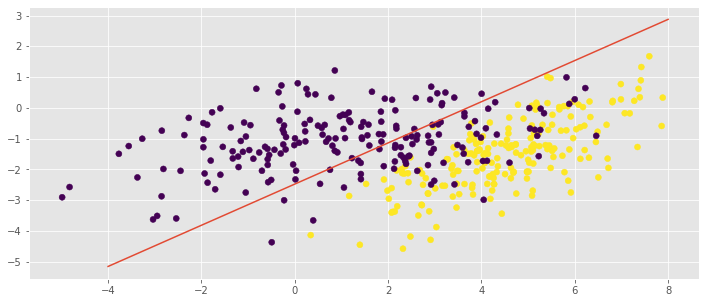

In [9]:
np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), np.zeros(200)]

clf = MySGDClassifier(batch_generator, model_type='log_reg', C=100, max_epoch=1000)
clf.fit(X, y, batch_size=100)

plot_decision_boundary(clf)

plt.scatter(X[:,0], X[:,1], c=y)

Далее будем анализировать Ваш алгоритм. 
Для этих заданий используйте датасет ниже.

In [10]:
from sklearn.datasets import make_classification

In [11]:
X, y = make_classification(n_samples=100000, n_features=10, 
                           n_informative=4, n_redundant=0, 
                           random_state=123, class_sep=1.0,
                           n_clusters_per_class=1)

Покажите сходимости обеих регрессией на этом датасете: изобразите график  функции потерь, усредненной по $N$ шагам градиентого спуска, для разных `alpha` (размеров шага). Разные `alpha` расположите на одном графике. 

$N$ можно брать 10, 50, 100 и т.д. 

In [12]:
from collections import defaultdict
N = 10
alpha = [10 ** -x for x in range(1, 5)]
log_loss = defaultdict(list)
lin_loss = defaultdict(list)
for a in alpha:
    model = MySGDClassifier(batch_generator, model_type='lin_reg', alpha=a)
    model.fit(X, y, batch_size=100)
    lin_loss[a] = np.mean(np.array(model.errors_log["loss"]).reshape((-1, N)), axis=1)

    model = MySGDClassifier(batch_generator, model_type='log_reg', alpha=a)
    model.fit(X, y, batch_size=100)
    log_loss[a] = np.mean(np.array(model.errors_log["loss"]).reshape((-1, N)), axis=1)

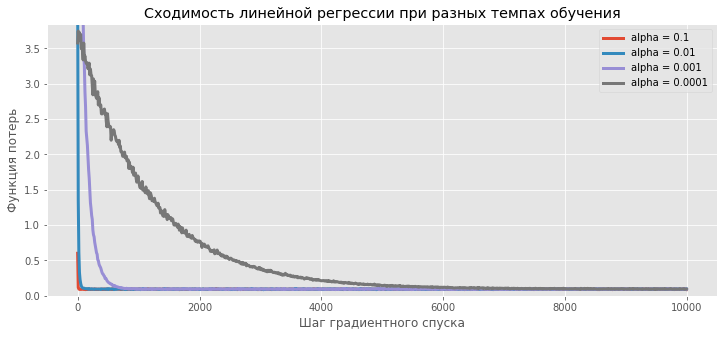

In [13]:
plt.title('Сходимость линейной регрессии при разных темпах обучения')
plt.ylabel('Функция потерь')
plt.xlabel('Шаг градиентного спуска')
for a in alpha:
    plt.ylim([0, np.amax(lin_loss[a]) + 0.1])
    plt.plot(np.arange(len(lin_loss[a])) * N, 
             lin_loss[a], 
             label='alpha = {}'.format(a),
             linewidth=3)
plt.legend()

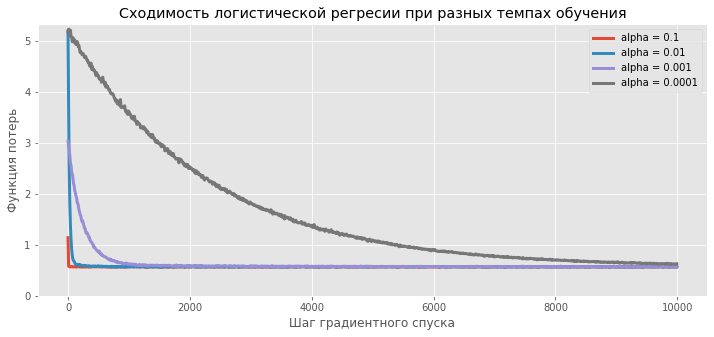

In [14]:
plt.title('Сходимость логистической регресии при разных темпах обучения')
plt.ylabel('Функция потерь')
plt.xlabel('Шаг градиентного спуска')
for a in alpha:
    plt.ylim([0, np.amax(log_loss[a]) + 0.1])
    plt.plot(np.arange(len(log_loss[a])) * N, 
             log_loss[a], 
             label='alpha = {}'.format(a),
             linewidth=3)
plt.legend()

Что Вы можете сказать про сходимость метода при различных `alpha`? Какое значение стоит выбирать для лучшей сходимости?

**Чем меньше `alpha`, теме медленнее сходятся методы. Для более быстрой сходимости не следует брать маленькие `alpha`, но для более точного отыскания минимума имеет смысл выбирать более маленькие `alpha`**

Изобразите график среднего значения весов для обеих регрессий в зависимости от коеф. регуляризации С из `np.logspace(3, -3, 10)` 

In [15]:
log_mean = []
lin_mean = []
for C in np.logspace(3, -3, 10):
    model = MySGDClassifier(batch_generator, C=C, model_type='lin_reg', alpha=alpha[-1])
    model.fit(X, y, batch_size=100)
    lin_mean.append(np.mean(model.weights[1:]))

    model = MySGDClassifier(batch_generator, C=C, model_type='log_reg', alpha=alpha[-1])
    model.fit(X, y, batch_size=100)
    log_mean.append(np.mean(model.weights[1:]))

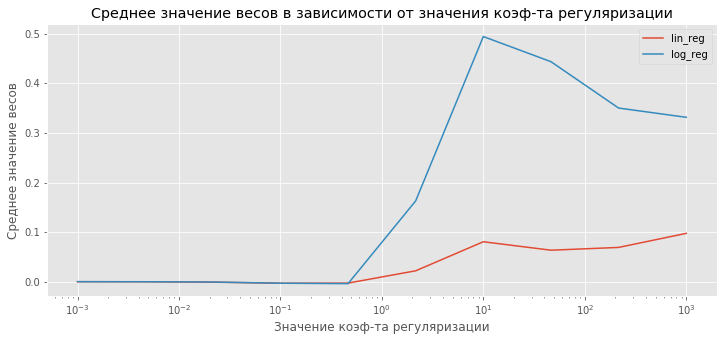

In [16]:
plt.title("Среднее значение весов в зависимости от значения коэф-та регуляризации")
plt.ylabel('Среднее значение весов')
plt.xlabel('Значение коэф-та регуляризации')
plt.xscale('log')
plt.plot(np.logspace(3, -3, 10), lin_mean, label='lin_reg')
plt.plot(np.logspace(3, -3, 10), log_mean, label='log_reg')
plt.legend()

Довольны ли Вы, насколько сильно уменьшились Ваши веса? 

**На графике видно, что при маленьких значениях коэф-та регуляризации среднее значение весов сильно уменьшилось, однако при слишком маленьком коэф-те регуляризации модель, очевидно будет показывать плохую точность**

# Боевое применение (4  балла)

**Защита данной части возможна только при преодолении в проекте бейзлайна Handmade baseline.**

Давайте применим модель на итоговом проекте! Датасет сделаем точно таким же образом, как было показано в project_overview.ipynb

Применим обе регрессии, подберем для них параметры и сравним качество. Может быть Вы еще одновременно с решением домашней работы подрастете на лидерборде!

In [17]:
doc_to_title = {}
with open('data/docs_titles.tsv',  encoding='utf-8') as f:
    for num_line, line in enumerate(f):
        if num_line == 0:
            continue
        data = line.strip().split('\t', 1)
        doc_id = int(data[0])
        if len(data) == 1:
            title = ''
        else:
            title = data[1]
        doc_to_title[doc_id] = title
print (len(doc_to_title))

28026


In [18]:
import pandas as pd
train_data = pd.read_csv('data/train_groups.csv')
traingroups_titledata = {}
for i in range(len(train_data)):
    new_doc = train_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    target = new_doc['target']
    title = doc_to_title[doc_id]
    if doc_group not in traingroups_titledata:
        traingroups_titledata[doc_group] = []
    traingroups_titledata[doc_group].append((doc_id, title, target))

In [19]:
import numpy as np
y = []
X = []
groups = []
for new_group in traingroups_titledata:
    docs = traingroups_titledata[new_group]
    for k, (doc_id, title, target_id) in enumerate(docs):
        y.append(target_id)
        groups.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j, target_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X.append(sorted(all_dist, reverse=True)[0:15]    )
X = np.array(X)
y = np.array(y)
groups = np.array(groups)
print (X.shape, y.shape, groups.shape)

(11690, 15) (11690,) (11690,)


Подберите размер батча для обучения. Линейная модель не должна учиться дольше нескольких минут. 

Не забывайте использовать скейлер!

In [20]:
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [21]:
X_scaled = StandardScaler().fit_transform(X)

Разбейте данные на обучение и валидацию. Подберите параметры C, alpha, max_epoch, model_type на валидации (Вы же помните, как правильно в этой задаче делать валидацию?)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, stratify=y)

Подберите порог линейной модели, по достижении которого, Вы будете относить объект к классу 1. Вспомните, какую метрику мы оптимизируем в соревновании.  Как тогда правильно подобрать порог?

In [23]:
from tqdm.notebook import tqdm
max_score_lin = 0
max_score_log = 0
for C in [10 ** (x - 2) for x in range(1, 6)]:
    for alpha in [10 ** -x for x in range(3, 5, 1)]:
        for max_epoch in [10 ** x for x in np.arange(1, 5)]:
            for batch_size in [10 ** x for x in np.arange(1, 5)]:
                model = MySGDClassifier(batch_generator, C=C, alpha=alpha, max_epoch=max_epoch, model_type='lin_reg')
                model.fit(X_train, y_train, batch_size=batch_size)
                prediction = model.predict(X_test)
                for threshold in np.linspace(0, 1, 1000, endpoint=False):
                    score = f1_score(y_test,  prediction > threshold)
                    if score > max_score_lin:
                        max_score_lin = score
                        best_params_lin = {"C": C, 
                                           "alpha": alpha, 
                                           "max_epoch": max_epoch, 
                                           "batch_size": batch_size,
                                           "threshold": threshold}
                
                model = MySGDClassifier(batch_generator, C=C, alpha=alpha, max_epoch=max_epoch, model_type='log_reg')
                model.fit(X_train, y_train, batch_size=batch_size)
                prediction = model.predict(X_test)
                for threshold in np.linspace(0, 1, 1000, endpoint=False):
                    score = f1_score(y_test,  prediction > threshold)
                    if score > max_score_lin:
                        max_score_log = score
                        best_params_log = {"C": C, 
                                           "alpha": alpha, 
                                           "max_epoch": max_epoch, 
                                           "batch_size": batch_size,
                                           "threshold": threshold}
                

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in log
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in multiply


In [24]:
if max_score_log > max_score_lin:
    model_type = "log_reg"
    best_params = best_params_log
else:
    model_type = "lin_reg"
    best_params = best_params_lin

In [25]:
max_score_log, max_score_lin

(0.6323304436511985, 0.6305418719211823)

In [26]:
best_params

{'C': 1000,
 'alpha': 0.001,
 'max_epoch': 10,
 'batch_size': 10,
 'threshold': 0.359}

С лучшими параметрами на валидации сделайте предсказание на тестовом множестве, отправьте его на проверку на платформу kaggle. Убедитесь, что Вы смогли побить public score первого бейзлайна.

** При сдаче домашки Вам необходимо кроме ссылки на ноутбук показать Ваш ник на kaggle, под которым Вы залили решение, которое побило Handmade baseline. **

In [27]:
test_data = pd.read_csv('data/test_groups.csv')
testgroups_titledata = {}
for i in range(len(test_data)):
    new_doc = test_data.iloc[i]
    doc_group = new_doc['group_id']
    doc_id = new_doc['doc_id']
    title = doc_to_title[doc_id]
    if doc_group not in testgroups_titledata:
        testgroups_titledata[doc_group] = []
    testgroups_titledata[doc_group].append((doc_id, title))
X_test = []
groups_test = []
for new_group in testgroups_titledata:
    docs = testgroups_titledata[new_group]
    for k, (doc_id, title) in enumerate(docs):
        groups_test.append(new_group)
        all_dist = []
        words = set(title.strip().split())
        for j in range(0, len(docs)):
            if k == j:
                continue
            doc_id_j, title_j = docs[j]
            words_j = set(title_j.strip().split())
            all_dist.append(len(words.intersection(words_j)))
        X_test.append(sorted(all_dist, reverse=True)[0:15])
X_test = np.array(X_test)
groups_test = np.array(groups_test)
print (X_test.shape, groups_test.shape)

(16627, 15) (16627,)


In [28]:
X_test.shape, test_data.pair_id.shape

((16627, 15), (16627,))

In [29]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_test_scaled = scaler.transform(X_test)
model = MySGDClassifier(batch_generator,
                        model_type=model_type, 
                        C=best_params["C"], 
                        alpha=best_params["alpha"], 
                        max_epoch=best_params["max_epoch"])
model.fit(X_scaled, y, batch_size=best_params["batch_size"])
answer = pd.DataFrame(test_data.pair_id, columns=['pair_id'])
prediction = model.predict(X_test) > best_params["threshold"]
answer['target'] = (model.predict(X_test_scaled) > best_params["threshold"]).astype(np.int64)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in log
C:\Anaconda\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: invalid value encountered in multiply


In [30]:
f1_score(y, model.predict(X_scaled) > best_params["threshold"])

0.6118847373500621

In [31]:
model.weights

array([-0.69530078, -0.21945944, -0.28026494,  0.31060705,  0.36649918,
        0.34703659, -0.1261634 , -0.17746919,  0.32867116,  0.10148095,
        0.16131383, -0.0158708 ,  0.01680649,  0.22669163, -0.21947214,
        0.32942838], dtype=float64)

In [32]:
answer.to_csv("Smirnov_GS.csv", index=False)

In [33]:
answer[answer.target > 0]

,pair_id,target
1,11692,1
2,11693,1
3,11694,1
4,11695,1
8,11699,1
...,...,...
16619,28310,1
16620,28311,1
16624,28315,1
16625,28316,1


In [34]:
sample = pd.read_csv('data/sample_submission.csv')

In [35]:
sample[sample.target < 1]

,pair_id,target
0,11691,0
2,11693,0
4,11695,0
5,11696,0
6,11697,0
...,...,...
16615,28306,0
16616,28307,0
16623,28314,0
16625,28316,0


# Фидбек (бесценно)

* Какие аспекты обучения линейных моделей Вам показались непонятными? Какое место стоит дополнительно объяснить?

***Ваше ответ здесь***

* Здесь Вы можете оставить отзыв о этой домашней работе или о всем курсе.   

*** ВАШ ОТЗЫВ ЗДЕСЬ***